## cargamos el dataset Iris

In [21]:
from pandas import DataFrame
import pandas as pd
from sklearn import datasets


dataset = pd.read_csv('iris.csv')
dataset.head(6)

,a,b,c,d,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


## se necesita convertir la última columna a valor número, para eso se utiliza LabelEncoder

In [22]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
lb.fit(dataset['class'])
last_column_numeric = lb.transform(dataset['class'])
last_column_numeric

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## una vez convertido, se elimina la columa de string y se agrega la nueva columna de valores numéricos

In [23]:
dataset.drop(columns='class', inplace=True)
dataset['group'] = last_column_numeric
dataset.head(5)

,a,b,c,d,group
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## agregamos las ventanas para las series de tiempo y calculamos la media de cada columna

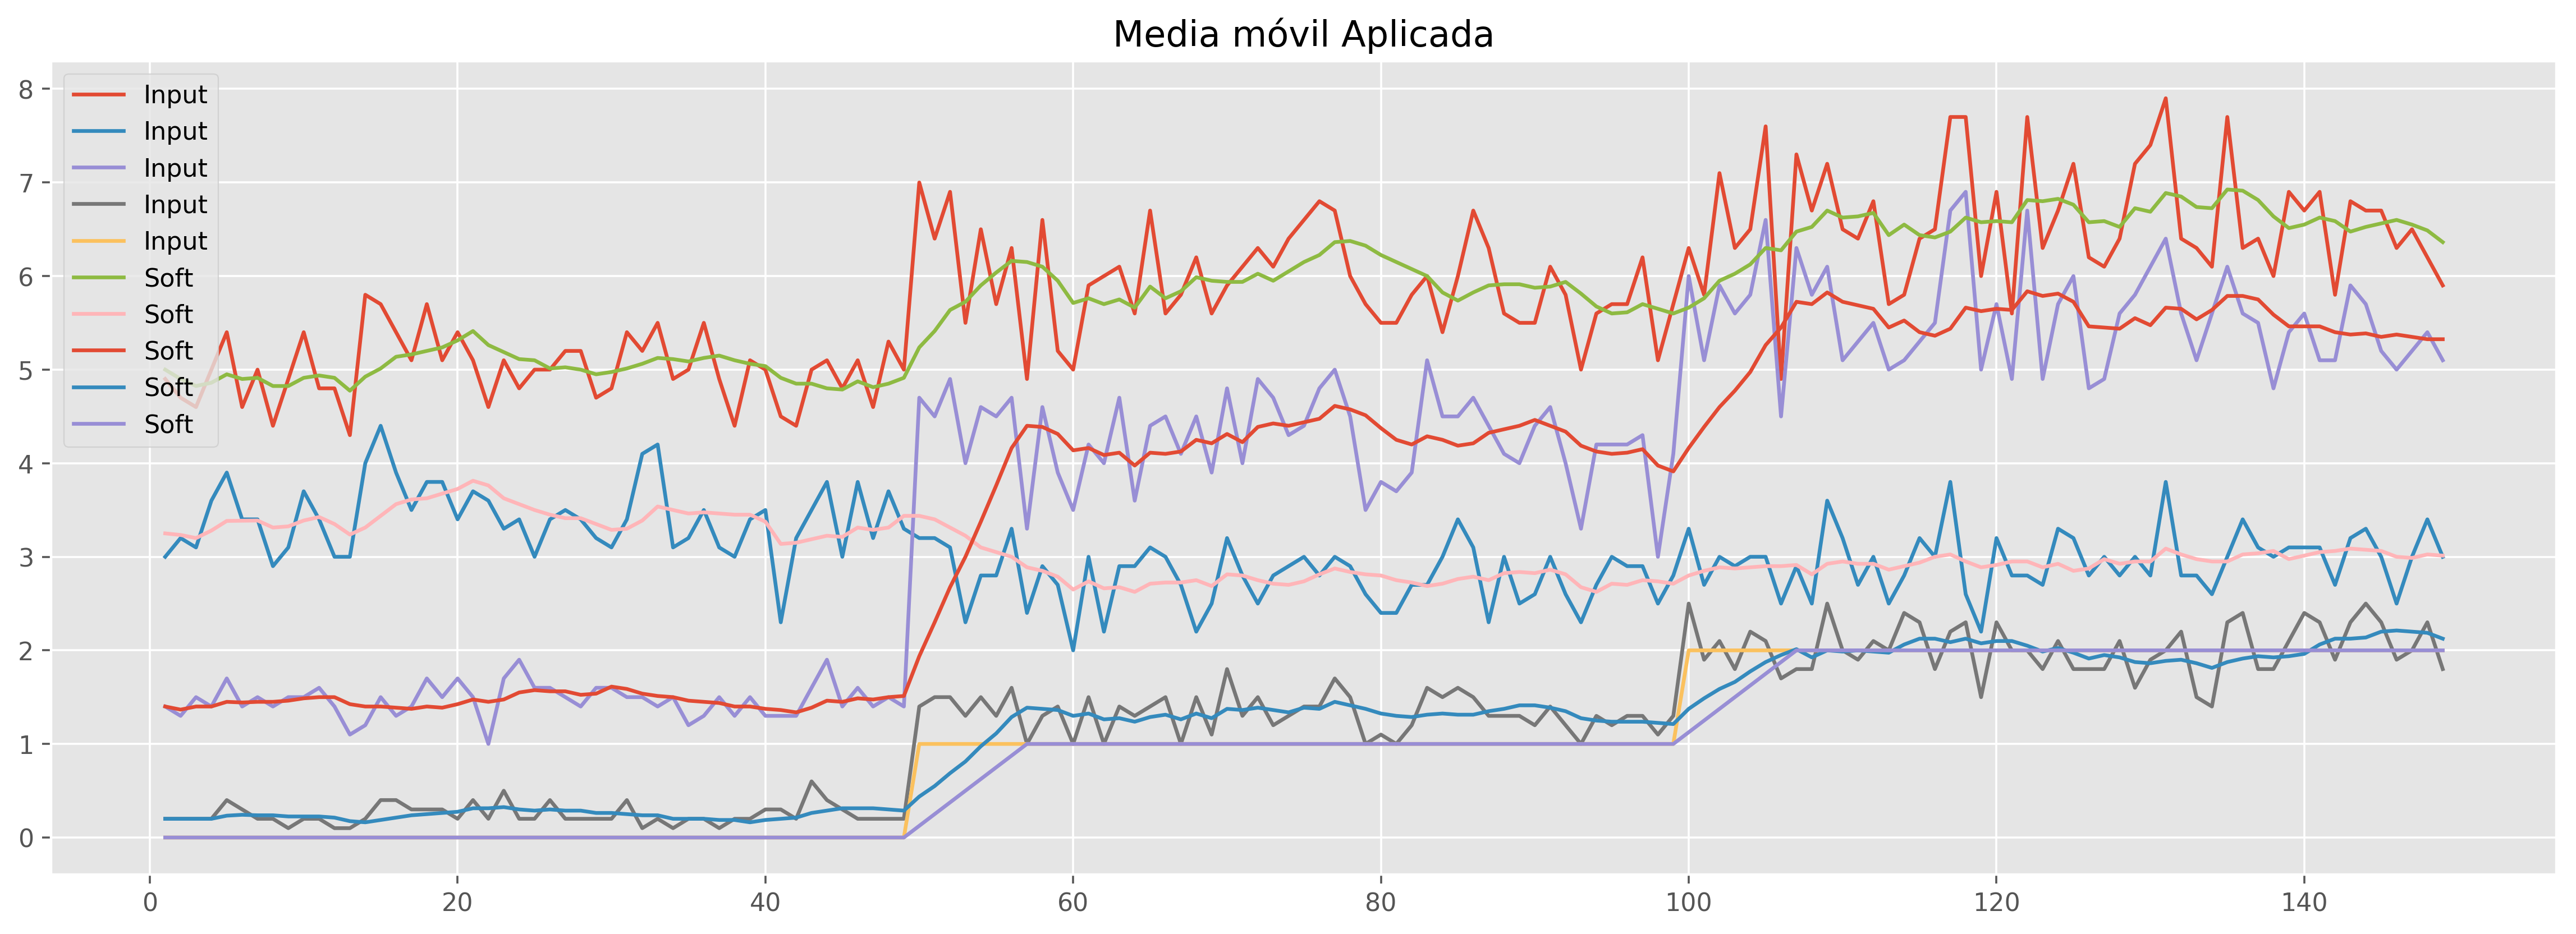

In [10]:
from matplotlib import pyplot

dataset_soft = dataset.rolling(window=8, min_periods=1).mean()

pyplot.figure(num=None, figsize=(18, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.style.use("ggplot")
pyplot.plot(dataset[1:150], label='Input')
pyplot.plot(dataset_soft[1:150], label='Soft')
pyplot.title('Media móvil Aplicada')
pyplot.legend()
pyplot.show()

In [25]:
import Tools as tls

size = 5

dataset_serialized = tls.series_to_supervised(dataset_soft,size, n_out=1, dropnan = True)
dataset_serialized.head(10)

,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
5,5.1000,3.500000,1.400000,0.200000,0.0,5.0000,3.250000,1.400000,0.200000,0.0,...,4.8600,3.280000,1.400000,0.200000,0.0,4.9500,3.383333,1.450000,0.233333,0.0
6,5.0000,3.250000,1.400000,0.200000,0.0,4.9000,3.233333,1.366667,0.200000,0.0,...,4.9500,3.383333,1.450000,0.233333,0.0,4.9000,3.385714,1.442857,0.242857,0.0
7,4.9000,3.233333,1.366667,0.200000,0.0,4.8250,3.200000,1.400000,0.200000,0.0,...,4.9000,3.385714,1.442857,0.242857,0.0,4.9125,3.387500,1.450000,0.237500,0.0
8,4.8250,3.200000,1.400000,0.200000,0.0,4.8600,3.280000,1.400000,0.200000,0.0,...,4.9125,3.387500,1.450000,0.237500,0.0,4.8250,3.312500,1.450000,0.237500,0.0
9,4.8600,3.280000,1.400000,0.200000,0.0,4.9500,3.383333,1.450000,0.233333,0.0,...,4.8250,3.312500,1.450000,0.237500,0.0,4.8250,3.325000,1.462500,0.225000,0.0
10,4.9500,3.383333,1.450000,0.233333,0.0,4.9000,3.385714,1.442857,0.242857,0.0,...,4.8250,3.325000,1.462500,0.225000,0.0,4.9125,3.387500,1.487500,0.225000,0.0
11,4.9000,3.385714,1.442857,0.242857,0.0,4.9125,3.387500,1.450000,0.237500,0.0,...,4.9125,3.387500,1.487500,0.225000,0.0,4.9375,3.425000,1.500000,0.225000,0.0
12,4.9125,3.387500,1.450000,0.237500,0.0,4.8250,3.312500,1.450000,0.237500,0.0,...,4.9375,3.425000,1.500000,0.225000,0.0,4.9125,3.350000,1.500000,0.212500,0.0
13,4.8250,3.312500,1.450000,0.237500,0.0,4.8250,3.325000,1.462500,0.225000,0.0,...,4.9125,3.350000,1.500000,0.212500,0.0,4.7750,3.237500,1.425000,0.175000,0.0
14,4.8250,3.325000,1.462500,0.225000,0.0,4.9125,3.387500,1.487500,0.225000,0.0,...,4.7750,3.237500,1.425000,0.175000,0.0,4.9250,3.312500,1.400000,0.162500,0.0


## Normalizamos los datos entre 0 y 1

In [18]:
from sklearn import preprocessing

datasetnorm = preprocessing.minmax_scale(dataset_serialized, feature_range=(0, 1))
datasetnorm = DataFrame(datasetnorm)
datasetnorm

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.151163,0.736842,0.013889,0.018987,0.0,0.104651,0.526316,0.013889,0.018405,0.0,...,0.039535,0.551579,0.013889,0.018293,0.0,0.081395,0.638596,0.025000,0.034553,0.0
1,0.104651,0.526316,0.013889,0.018987,0.0,0.058140,0.512281,0.006481,0.018405,0.0,...,0.081395,0.638596,0.025000,0.034553,0.0,0.058140,0.640602,0.023413,0.039199,0.0
2,0.058140,0.512281,0.006481,0.018987,0.0,0.023256,0.484211,0.013889,0.018405,0.0,...,0.058140,0.640602,0.023413,0.039199,0.0,0.063953,0.642105,0.025000,0.036585,0.0
3,0.023256,0.484211,0.013889,0.018987,0.0,0.039535,0.551579,0.013889,0.018405,0.0,...,0.063953,0.642105,0.025000,0.036585,0.0,0.023256,0.578947,0.025000,0.036585,0.0
4,0.039535,0.551579,0.013889,0.018987,0.0,0.081395,0.638596,0.025000,0.034765,0.0,...,0.023256,0.578947,0.025000,0.036585,0.0,0.023256,0.589474,0.027778,0.030488,0.0
5,0.081395,0.638596,0.025000,0.035865,0.0,0.058140,0.640602,0.023413,0.039439,0.0,...,0.023256,0.589474,0.027778,0.030488,0.0,0.063953,0.642105,0.033333,0.030488,0.0
6,0.058140,0.640602,0.023413,0.040687,0.0,0.063953,0.642105,0.025000,0.036810,0.0,...,0.063953,0.642105,0.033333,0.030488,0.0,0.075581,0.673684,0.036111,0.030488,0.0
7,0.063953,0.642105,0.025000,0.037975,0.0,0.023256,0.578947,0.025000,0.036810,0.0,...,0.075581,0.673684,0.036111,0.030488,0.0,0.063953,0.610526,0.036111,0.024390,0.0
8,0.023256,0.578947,0.025000,0.037975,0.0,0.023256,0.589474,0.027778,0.030675,0.0,...,0.063953,0.610526,0.036111,0.024390,0.0,0.000000,0.515789,0.019444,0.006098,0.0
9,0.023256,0.589474,0.027778,0.031646,0.0,0.063953,0.642105,0.033333,0.030675,0.0,...,0.000000,0.515789,0.019444,0.006098,0.0,0.069767,0.578947,0.013889,0.000000,0.0


## dividimos las variables predictoras X y la variable dependiente Y

In [28]:
zy = datasetnorm.iloc[:, -1:]
zx = datasetnorm.iloc[:, :-1].values

## Asignamos a un arreglo numpy las variables obtenidas

In [29]:
import numpy as np

X = np.array(zx, dtype='float64')
y = np.array(zy, dtype='float64')

## separamos los datos en datos de entrenamiento y de pruebas

In [13]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)
print (X_train.shape, y_train.shape)

(101, 29) (101, 1)


## entrenamos el algoritmo KNN con 4 vecinos

In [30]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=4, p=2,
          weights='uniform')

## realizamos la predicción con la X de prueba

In [31]:
from sklearn.metrics import mean_squared_error

pred = knn.predict(X_test)
pred

array([[0.5     ],
       [0.      ],
       [0.      ],
       [1.      ],
       [0.4375  ],
       [0.      ],
       [0.5     ],
       [0.      ],
       [1.      ],
       [0.5     ],
       [0.      ],
       [1.      ],
       [1.      ],
       [0.5     ],
       [0.      ],
       [0.625   ],
       [0.4375  ],
       [1.      ],
       [0.      ],
       [0.5     ],
       [0.5     ],
       [0.5     ],
       [0.5     ],
       [0.5     ],
       [0.      ],
       [0.5     ],
       [0.      ],
       [1.      ],
       [1.      ],
       [0.5     ],
       [0.8125  ],
       [0.5     ],
       [0.      ],
       [1.      ],
       [0.0625  ],
       [0.015625],
       [1.      ],
       [0.      ],
       [0.078125],
       [0.      ],
       [0.      ],
       [0.5     ],
       [0.5     ],
       [1.      ]])

## El performance de predicción que tiene el algoritmo es de 98%

In [17]:
knn.score(X_test, y_test)

0.9821673031198214

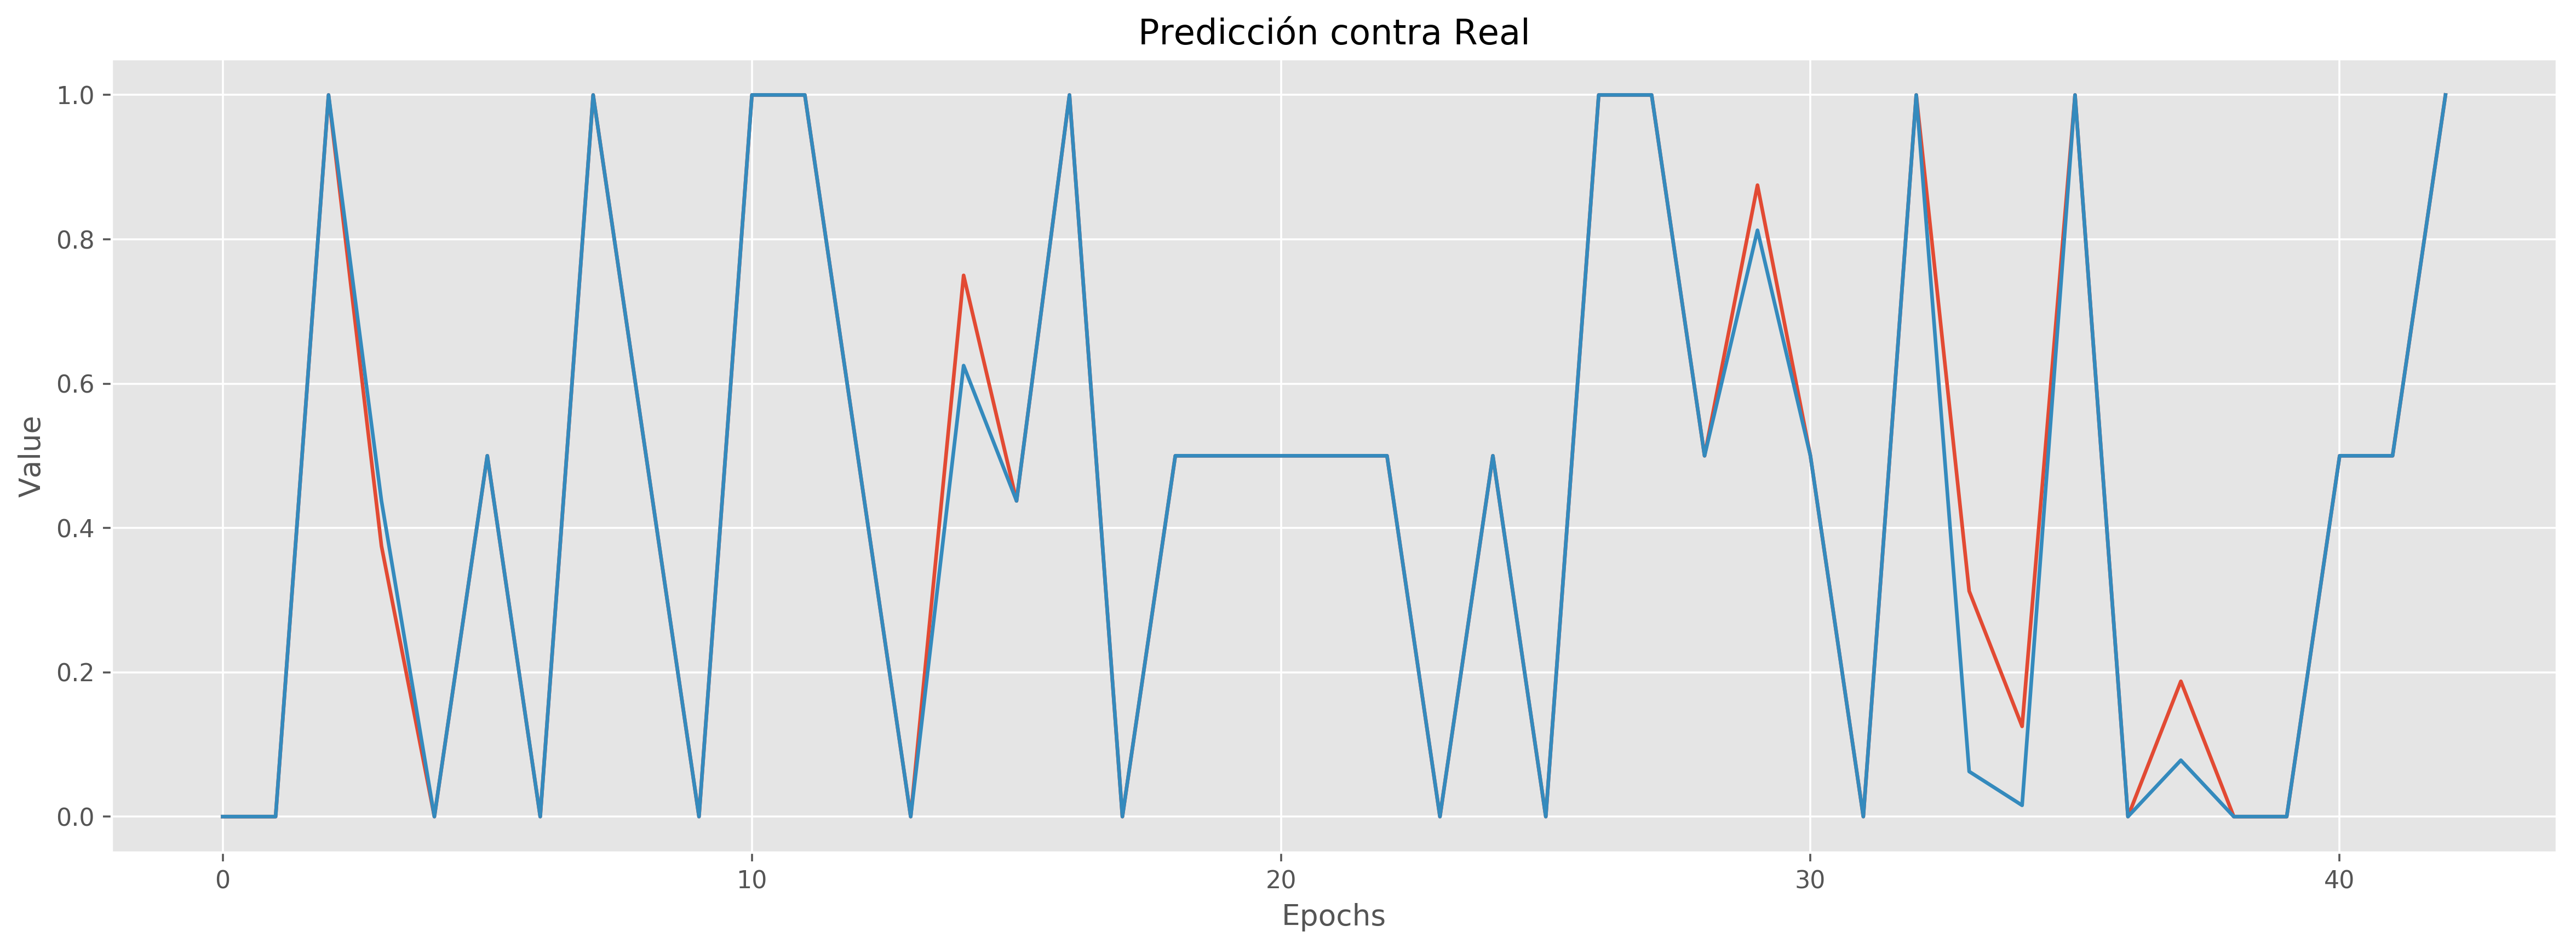

In [32]:
pyplot.figure(num=None, figsize=(18, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.plot(y_test[1:100,]) #Valores ajustables para grafica
pyplot.plot(pred[1:100,])
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.title('Predicción contra Real')
pyplot.show()